In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from preprocessing import *
from models import *

In [2]:
(train_X, train_y, test_X, test_y) = load_data()

In [3]:
# find hist features
feats = dict()
for feat in train_X.columns:
    fid = feat.split('_')[0]
    if(fid not in feats.keys()):
        feats[fid] = 1
    else:
        feats[fid] += 1
for fid in feats:
    if(feats[fid] > 1): 
        print("%s: %s" %(fid,feats[fid]))

ee: 10
ba: 10
cs: 10
az: 10
cn: 10
ay: 10
ag: 10


In [4]:
describe = train_X.describe()
describe

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


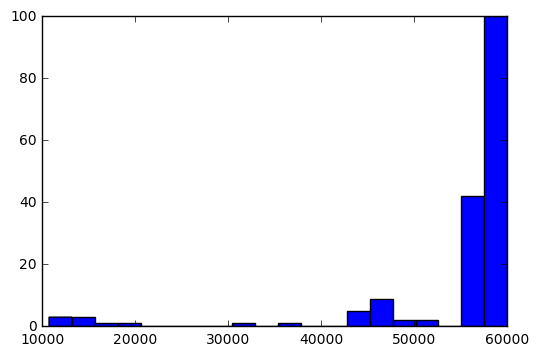

{'aa_000': 60000.0,
 'ab_000': 13671.0,
 'ac_000': 56665.0,
 'ad_000': 45139.0,
 'ae_000': 57500.0,
 'af_000': 57500.0,
 'ag_000': 59329.0,
 'ag_001': 59329.0,
 'ag_002': 59329.0,
 'ag_003': 59329.0,
 'ag_004': 59329.0,
 'ag_005': 59329.0,
 'ag_006': 59329.0,
 'ag_007': 59329.0,
 'ag_008': 59329.0,
 'ag_009': 59329.0,
 'ah_000': 59355.0,
 'ai_000': 59371.0,
 'aj_000': 59371.0,
 'ak_000': 55600.0,
 'al_000': 59358.0,
 'am_0': 59371.0,
 'an_000': 59358.0,
 'ao_000': 59411.0,
 'ap_000': 59358.0,
 'aq_000': 59411.0,
 'ar_000': 57277.0,
 'as_000': 59371.0,
 'at_000': 59371.0,
 'au_000': 59371.0,
 'av_000': 57500.0,
 'ax_000': 57499.0,
 'ay_000': 59329.0,
 'ay_001': 59329.0,
 'ay_002': 59329.0,
 'ay_003': 59329.0,
 'ay_004': 59329.0,
 'ay_005': 59329.0,
 'ay_006': 59329.0,
 'ay_007': 59329.0,
 'ay_008': 59329.0,
 'ay_009': 59329.0,
 'az_000': 59329.0,
 'az_001': 59329.0,
 'az_002': 59329.0,
 'az_003': 59329.0,
 'az_004': 59329.0,
 'az_005': 59329.0,
 'az_006': 59329.0,
 'az_007': 59329.0,
 '

In [5]:
plt.hist(describe.iloc[0],20)
plt.show()
dict(describe.iloc[0])

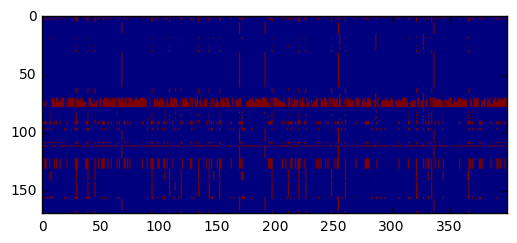

In [6]:
plt.imshow(train_X.iloc[0:400,:].isnull().values.T)
plt.show()

In [7]:
y_true = np.array([1,1,1,0,0])
y_pred = np.array([1,0,1,1,0])
np.sum((y_true != y_pred) * y_pred) / (len(y_true) - np.sum(y_true))

0.5

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
X = train_X.fillna(train_X.median()).values
y = train_y.values
X_test = test_X.fillna(test_X.median()).values
y_test = test_y.values
cart = DecisionTreeClassifier()
cart = cart.fit(X, y)
y_pred = cart.predict(X_test)
metrics(y_test, y_pred)


accuracy score: 0.989
precision: 0.793510324484
recall: 0.717333333333
total_cost: 3.35625


In [14]:
all_X = pd.concat([train_X, test_X], axis=0)
num_null = dict(all_X.isnull().sum())

In [15]:
num_null

{'aa_000': 0,
 'ab_000': 58692,
 'ac_000': 4261,
 'ad_000': 18842,
 'ae_000': 3190,
 'af_000': 3190,
 'ag_000': 860,
 'ag_001': 860,
 'ag_002': 860,
 'ag_003': 860,
 'ag_004': 860,
 'ag_005': 860,
 'ag_006': 860,
 'ag_007': 860,
 'ag_008': 860,
 'ag_009': 860,
 'ah_000': 820,
 'ai_000': 792,
 'aj_000': 792,
 'ak_000': 5598,
 'al_000': 811,
 'am_0': 792,
 'an_000': 811,
 'ao_000': 751,
 'ap_000': 811,
 'aq_000': 751,
 'ar_000': 3487,
 'as_000': 792,
 'at_000': 792,
 'au_000': 792,
 'av_000': 3188,
 'ax_000': 3189,
 'ay_000': 863,
 'ay_001': 863,
 'ay_002': 863,
 'ay_003': 863,
 'ay_004': 863,
 'ay_005': 863,
 'ay_006': 863,
 'ay_007': 863,
 'ay_008': 863,
 'ay_009': 863,
 'az_000': 863,
 'az_001': 863,
 'az_002': 863,
 'az_003': 863,
 'az_004': 863,
 'az_005': 863,
 'az_006': 863,
 'az_007': 863,
 'az_008': 863,
 'az_009': 863,
 'ba_000': 881,
 'ba_001': 881,
 'ba_002': 881,
 'ba_003': 881,
 'ba_004': 881,
 'ba_005': 881,
 'ba_006': 881,
 'ba_007': 881,
 'ba_008': 881,
 'ba_009': 881,
 

In [18]:
76000*0.1

7600.0